# Algorithmic Trading in Practice

https://medium.com/the-owl/algorithmic-trading-strategies-5c3b9d6ab618
1. Buy shares of a stock when its 30-day moving average goes above the 100-day moving average.
2. Sell shares of the stock when its 30-day moving average goes below the 100-day moving average.
By calculating the moving average, the impacts of random, short-term fluctuations on the price of a stock over a specified time-frame are mitigated.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
plt.style.use('fivethirtyeight')

## Read CSV

In [2]:
symbol = 'GOOGL'
stock = pd.read_csv("dataset/stock/"+symbol+".csv")
stock

,date,1. open,2. high,3. low,4. close,5. volume
0,2020-01-07,1400.46,1403.50,1391.56,1395.110,1677342.0
1,2020-01-06,1351.63,1398.32,1351.00,1397.810,2339343.0
2,2020-01-03,1348.00,1373.75,1347.32,1361.520,1170629.0
3,2020-01-02,1348.41,1368.68,1346.49,1368.680,1364265.0
4,2019-12-31,1335.79,1340.66,1332.13,1339.390,976061.0
...,...,...,...,...,...,...
3868,2004-08-25,104.76,108.00,103.88,106.000,9188600.0
3869,2004-08-24,111.24,111.60,103.57,104.870,15247300.0
3870,2004-08-23,110.76,113.48,109.05,109.400,18256100.0
3871,2004-08-20,101.01,109.08,100.50,108.310,22834300.0


In [3]:
stock = stock.drop('date', axis=1)
stock = stock[::-1] # reverse index because .csv top column is most recent price 
stock = stock.reset_index()
stock = stock.drop('index', axis=1)

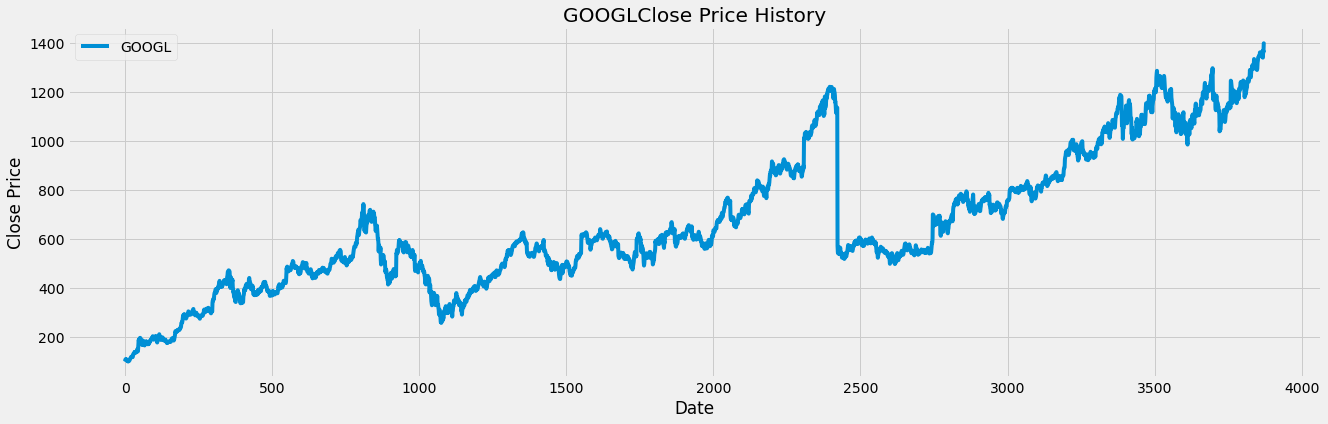

In [4]:
## Visualize Data
plt.figure(figsize=(20,6))
plt.plot(stock['4. close'],label = symbol)
plt.title(symbol+'Close Price History')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend(loc='upper left')
plt.show()

## Stock Moving Average (SMA)

In [5]:
#Creating Simple Moving Average with 30-day Window
sma30=pd.DataFrame()
sma30['Close']=stock['4. close'].rolling(window=30).mean()

#Creating Simple Moving Average with 100-day Window
sma100=pd.DataFrame()
sma100['Close']=stock['4. close'].rolling(window=100).mean()

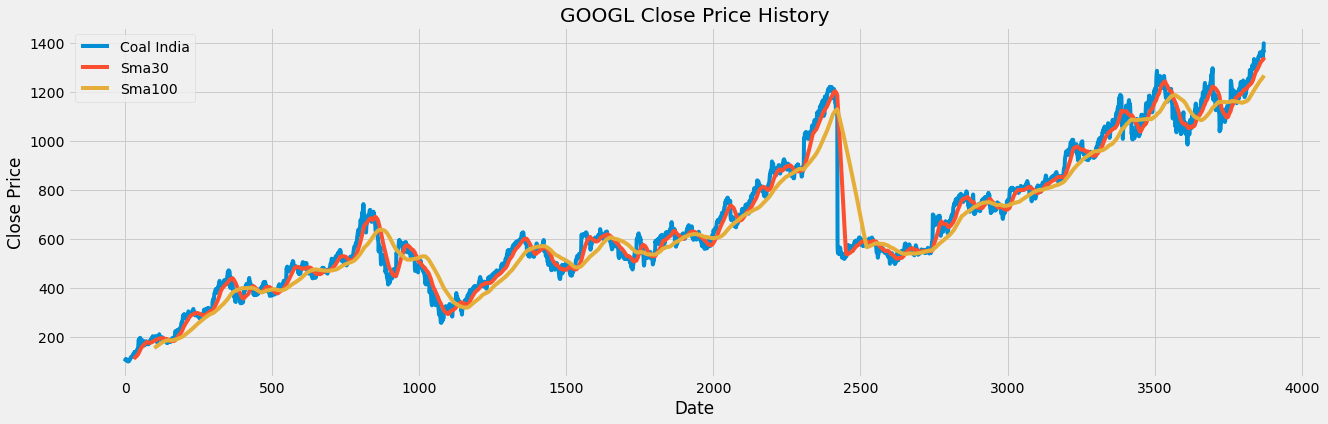

In [6]:
#Visualize to compare
plt.figure(figsize=(20,6))
plt.plot(stock['4. close'],label = 'Coal India')
plt.plot(sma30['Close'],label = 'Sma30')
plt.plot(sma100['Close'],label = 'Sma100')
plt.title(symbol+' Close Price History')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend(loc='upper left')
plt.show()

In [7]:
#Creating a new dataframe to store all data
data=pd.DataFrame()
data['stock']=stock['4. close']
data['sma30']=sma30['Close']
data['sma100']=sma100['Close']

## Buy Sell

In [8]:
def buy_sell(data):
  sigPriceBuy=[]
  sigPriceSell=[]
  flag=-1

  for i in range(len(data)):
    if data['sma30'][i]>data['sma100'][i]:
      if flag != 1:
        sigPriceBuy.append(data['stock'][i])
        sigPriceSell.append(np.nan)
        flag=1
      else:
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(np.nan)
    elif data['sma30'][i]<data['sma100'][i]:
      if flag != 0 :
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(data['stock'][i])
        flag = 0
      else:
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(np.nan)
    else:
      sigPriceBuy.append(np.nan)
      sigPriceSell.append(np.nan)

  return(sigPriceBuy,sigPriceSell)

In [9]:
buy_sell = buy_sell(data)
data['Buy_Signal_Price']=buy_sell[0]
data['Sell_Signal_Price']=buy_sell[1]

## Visualize Output

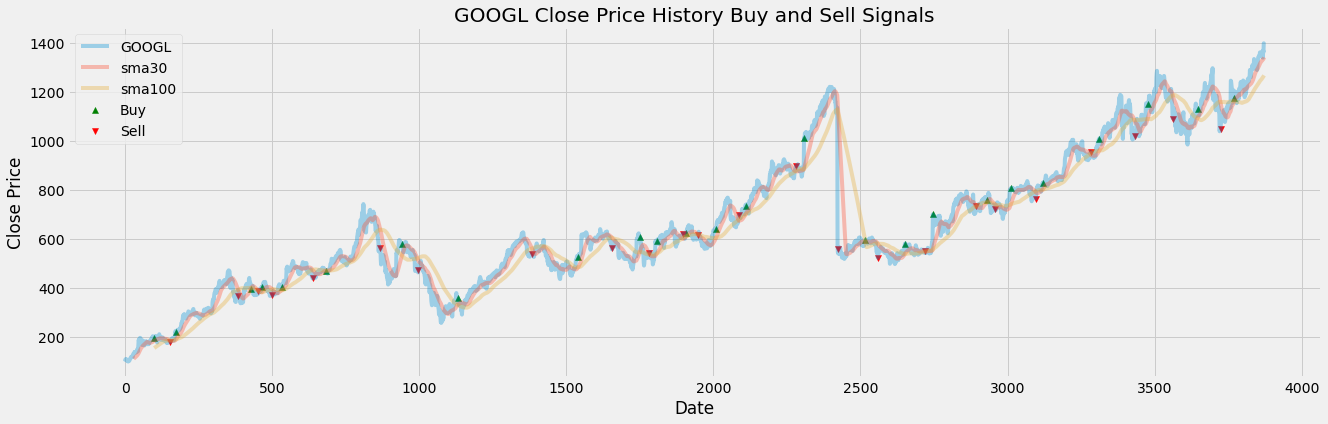

In [14]:
#Visualize the Data
plt.figure(figsize=(20,6))
plt.plot(stock['4. close'],label = symbol,alpha=0.35)
plt.plot(sma30['Close'],label = 'sma30' ,alpha=0.35)
plt.plot(sma100['Close'],label = 'sma100' ,alpha=0.35)
plt.scatter(data.index,data['Buy_Signal_Price'],label='Buy',marker='^',color='green')
plt.scatter(data.index,data['Sell_Signal_Price'],label='Sell',marker='v',color='red')
plt.title(symbol+' Close Price History Buy and Sell Signals')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend(loc='upper left')
plt.show()